In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/IRIS.csv',encoding='latin1')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

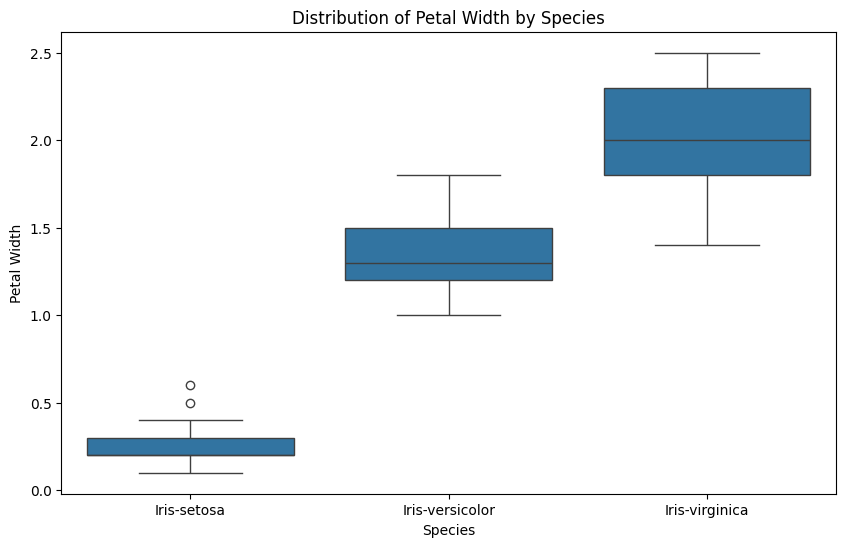

In [ ]:
# Create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="petal_width", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.title("Distribution of Petal Width by Species")

# Show plot
plt.show()

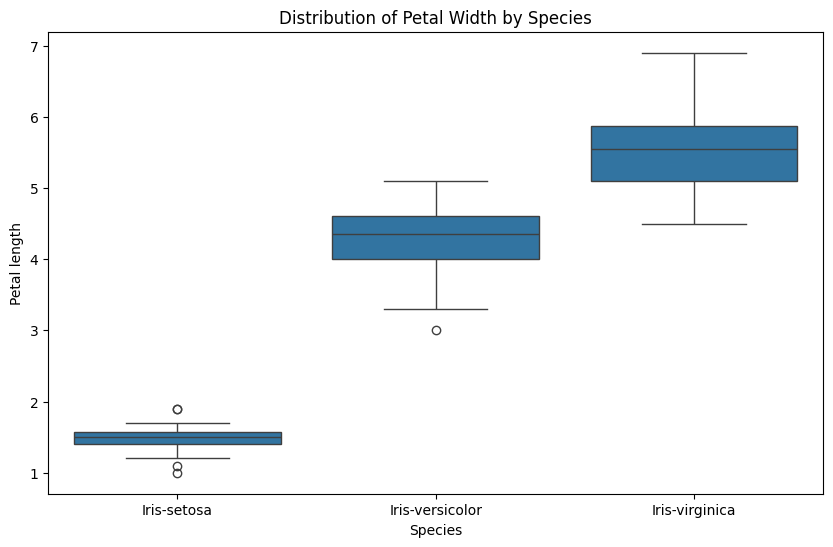

In [ ]:
# Create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="petal_length", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Petal length")
plt.title("Distribution of Petal Width by Species")

# Show plot
plt.show()

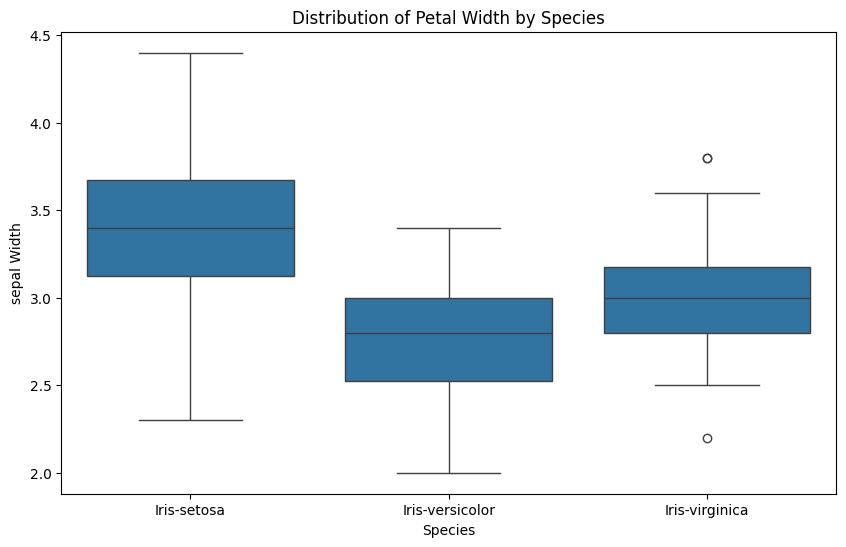

In [ ]:
# Create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_width", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("sepal Width")
plt.title("Distribution of Petal Width by Species")

# Show plot
plt.show()

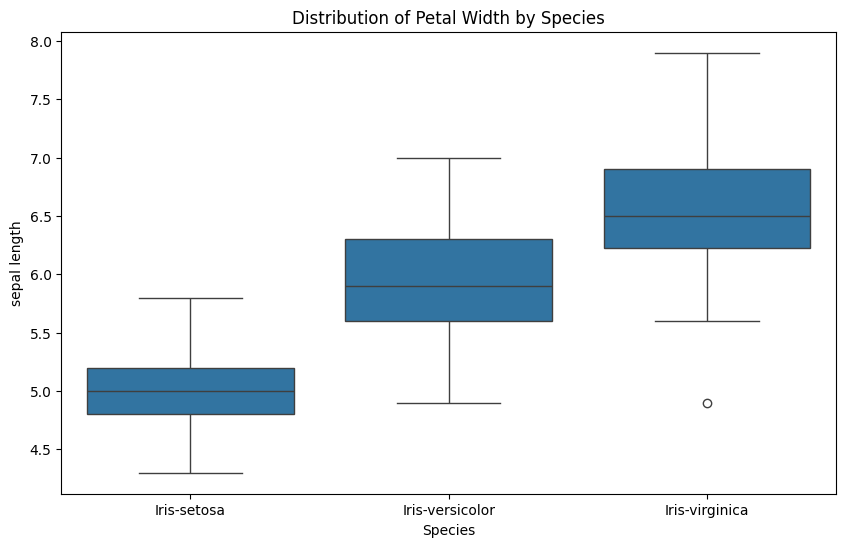

In [ ]:
# Create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_length", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("sepal length")
plt.title("Distribution of Petal Width by Species")

# Show plot
plt.show()

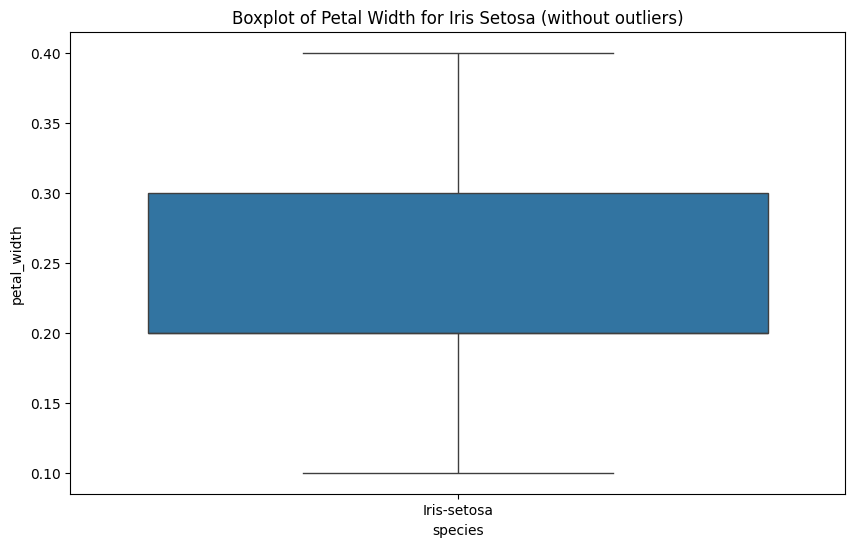

In [ ]:
# Filter the dataset for iris_setosa
iris_setosa = df[df['species'] == 'Iris-setosa']

# Calculate the IQR (Interquartile Range) for petal_width
Q1 = iris_setosa['petal_width'].quantile(0.25)
Q3 = iris_setosa['petal_width'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
iris_setosa_no_outliers = iris_setosa[(iris_setosa['petal_width'] >= lower_bound) & (iris_setosa['petal_width'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_width', data=iris_setosa_no_outliers)
plt.title('Boxplot of Petal Width for Iris Setosa (without outliers)')
plt.show()
# Print the number of data points before and after outlier removal
# print("Number of data points before removing outliers:", len(iris_setosa))
# print("Number of data points after removing outliers:", len(iris_setosa_no_outliers))

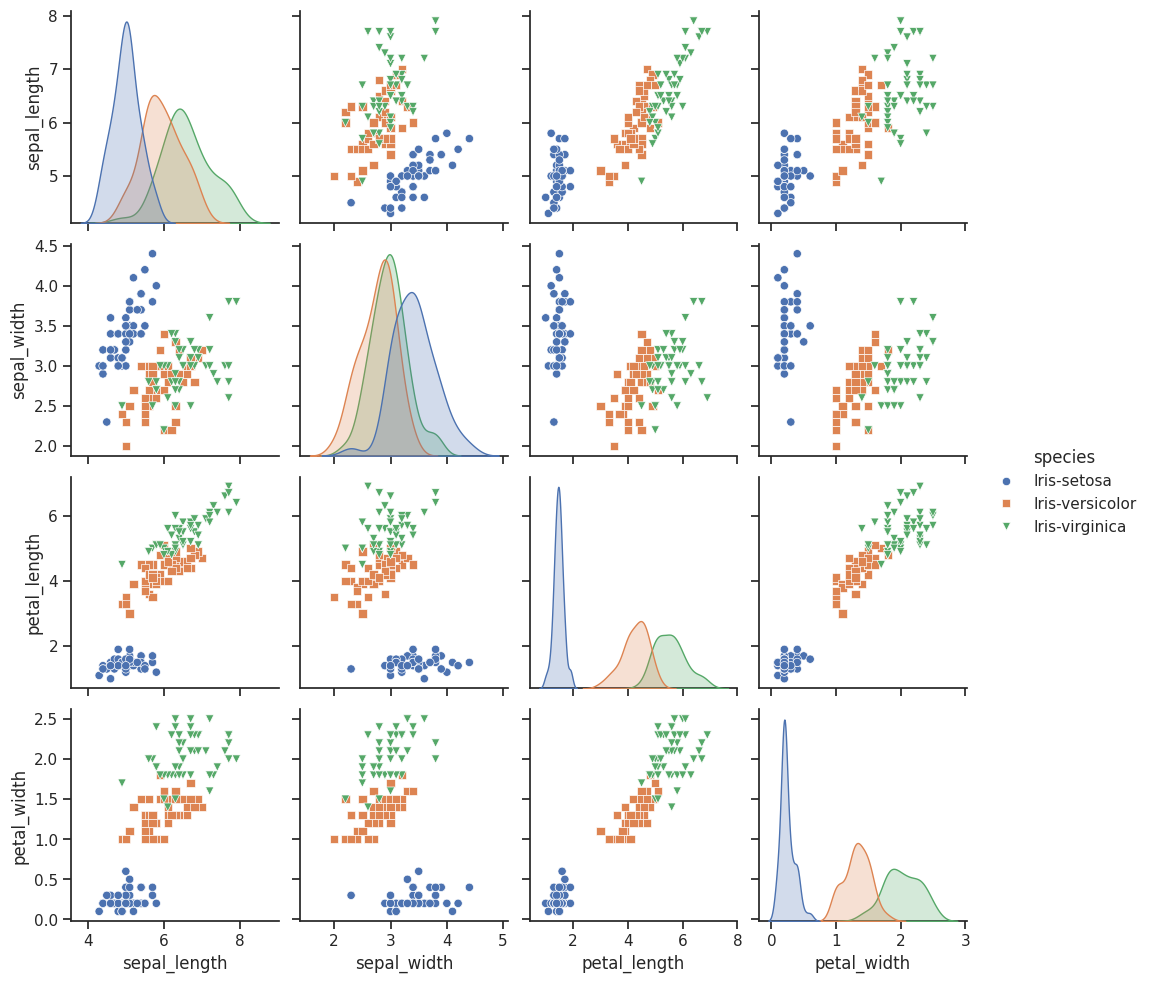

In [ ]:
sns.set(style="ticks")
sns.pairplot(df,hue="species", markers=["o", "s", "v"])
plt.show()

Removing the outliers present in specific attributes of each species. Replacing them with mean. As observed in the previous visualizations

<ipython-input-19-bc9eebf89601>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
<ipython-input-19-bc9eebf89601>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
<ipython-input-19-bc9eebf89601>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
<ipython-input-19-bc9eebf89601>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

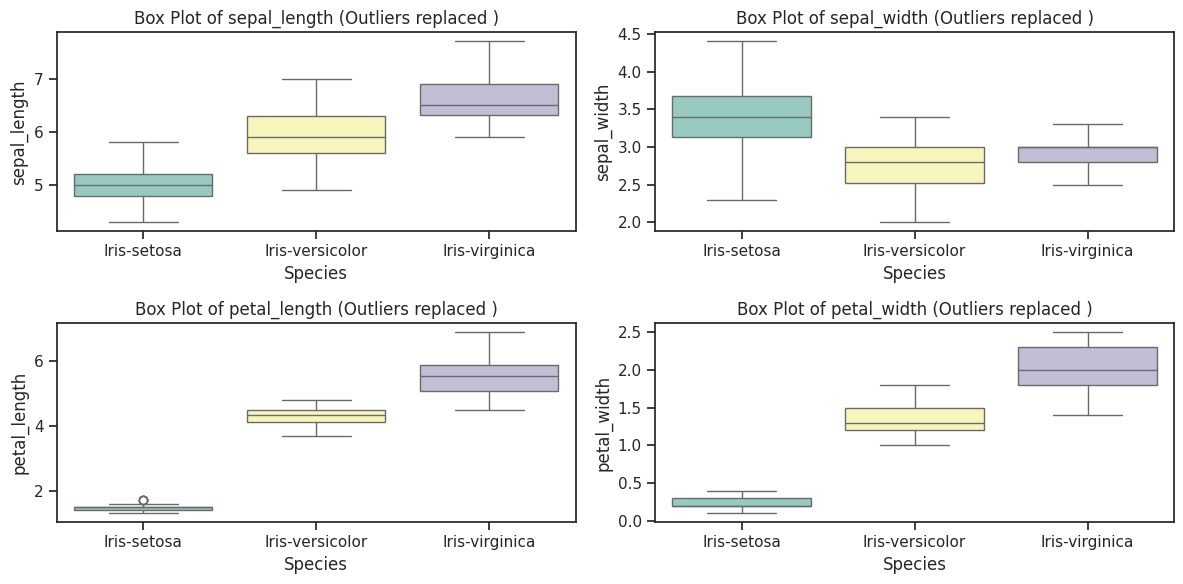

In [ ]:
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species_with_outliers = {'Iris-setosa': ['petal_length', 'petal_width'],
                         'Iris-versicolor': ['petal_length'],
                         'Iris-virginica': ['sepal_length', 'sepal_width']}

# Find and replace outliers with median for specific species and attributes
for species, outlier_columns in species_with_outliers.items():
    for column in outlier_columns:
        q_low = df[df['species'] == species][column].quantile(0.05)
        q_high = df[df['species'] == species][column].quantile(0.95)

        # Replace outliers with median
        median_value = df[df['species'] == species][column].median()
        df.loc[(df['species'] == species) & ((df[column] < q_low) | (df[column] > q_high)), column] = median_value

# Box plots for each attribute with 'species' as hue after handling outliers
sns.set(style="ticks")
plt.figure(figsize=(12, 6))

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df, palette='Set3')

    plt.title(f'Box Plot of {column} (Outliers replaced )')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop("species", axis=1)
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", score)

Accuracy Score:  0.9333333333333333
